### 1. Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 2. Importing dataset, creating dataframe and display first five row of dataframe

In [2]:
df = pd.read_csv(r'flight_price_for_prediction.csv')
df.head()

,Unnamed: 0,Flight name,Departure_time,Arrival_time,Price,Source,Destination,Duration,No of stop,Date
0,0,SpiceJet,21:45,23:45,7308,Mumbai,Delhi,2h,Non,2022-03-22
1,1,IndiGo,17:15,19:20,7308,Mumbai,Delhi,2h 5m,Non,2022-03-22
2,2,IndiGo,18:30,20:35,7308,Mumbai,Delhi,2h 5m,Non,2022-03-22
3,3,IndiGo,20:30,22:35,7308,Mumbai,Delhi,2h 5m,Non,2022-03-22
4,4,IndiGo,22:20,00:25,7308,Mumbai,Delhi,2h 5m,Non,2022-03-22


#### Dropping 'Unamed: 0' column

In [3]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [4]:
df.head()

,Flight name,Departure_time,Arrival_time,Price,Source,Destination,Duration,No of stop,Date
0,SpiceJet,21:45,23:45,7308,Mumbai,Delhi,2h,Non,2022-03-22
1,IndiGo,17:15,19:20,7308,Mumbai,Delhi,2h 5m,Non,2022-03-22
2,IndiGo,18:30,20:35,7308,Mumbai,Delhi,2h 5m,Non,2022-03-22
3,IndiGo,20:30,22:35,7308,Mumbai,Delhi,2h 5m,Non,2022-03-22
4,IndiGo,22:20,00:25,7308,Mumbai,Delhi,2h 5m,Non,2022-03-22


### 3. Explore dataframe

#### a). Dataframe Shape

In [5]:
df.shape

(9598, 9)

##### Outcome : There are total 9598 rows and 9 columns in the dataframe.

#### b). Dataframe info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9598 entries, 0 to 9597
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Flight name     9598 non-null   object
 1   Departure_time  9598 non-null   object
 2   Arrival_time    9598 non-null   object
 3   Price           9598 non-null   int64 
 4   Source          9598 non-null   object
 5   Destination     9598 non-null   object
 6   Duration        9598 non-null   object
 7   No of stop      9598 non-null   object
 8   Date            9598 non-null   object
dtypes: int64(1), object(8)
memory usage: 675.0+ KB


##### Outcome :
* All columns are of object type.
* No null value present in the dataframe.

#### c). Cross checking the null values

In [7]:
df.isnull().sum()

Flight name       0
Departure_time    0
Arrival_time      0
Price             0
Source            0
Destination       0
Duration          0
No of stop        0
Date              0
dtype: int64

##### Outcome : No null value is present in the dataset.

#### d). Checking the uniqueness of values in each column

In [8]:
df.nunique()

Flight name          6
Departure_time     203
Arrival_time       237
Price             1164
Source               2
Destination          4
Duration           361
No of stop           5
Date                10
dtype: int64

#### e). Checking the values type count of each column

In [9]:
for i in df.columns:
    print('The value count for '+i+' is :\n',df[i].value_counts())
    print('-----------------------------------------------------')
    print('-----------------------------------------------------')

The value count for Flight name is :
 Vistara      3226
Air India    2180
IndiGo       1915
Go First     1234
Air Asia      696
SpiceJet      347
Name: Flight name, dtype: int64
-----------------------------------------------------
-----------------------------------------------------
The value count for Departure_time is :
 11:30    267
06:00    248
07:00    245
19:55    216
19:00    198
        ... 
22:10      1
14:10      1
21:50      1
05:00      1
08:35      1
Name: Departure_time, Length: 203, dtype: int64
-----------------------------------------------------
-----------------------------------------------------
The value count for Arrival_time is :
 16:20    354
22:55    274
19:45    221
20:15    197
20:55    186
        ... 
02:30      1
13:20      1
17:50      1
07:15      1
00:00      1
Name: Arrival_time, Length: 237, dtype: int64
-----------------------------------------------------
-----------------------------------------------------
The value count for Price is :
 4788  

##### Outcome :
* Date,Arrival_Time,Dep_Time should be in datetime i.e. timestamp.
* From Date day,month & year should be in separate column.
* Duration should be in proper form or Based on Arrival_Time,Departure_Time we can calculate.

### 4. Data Preprocessing

#### a). Features Extraction

In [10]:
df.dtypes

Flight name       object
Departure_time    object
Arrival_time      object
Price              int64
Source            object
Destination       object
Duration          object
No of stop        object
Date              object
dtype: object

##### Outcome : 
* I am going to convert Date,Arrival_Time,Dep_Time into datetime i.e. timestamp.
* From Date i am extracting day,month & year in separate column.
* Based on Arrival_Time,Departure_Time i am calculating the duration by taking the difference which give me output data as timedelta. After obtaining timedelta i will obtain data in seconds then convert these second into mintues by dividing 60,then convert it into hour by again dividing 60 or simply divide seconds by 3600.
Then replace the final result into Duration.
* From Arrival_Time,Departure_Time i am extracting Hour & Minute in separate column.

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df['Arrival_time'] = pd.to_datetime(df['Arrival_time'])
df['Departure_time'] = pd.to_datetime(df['Departure_time'])

In [12]:
df.dtypes

Flight name               object
Departure_time    datetime64[ns]
Arrival_time      datetime64[ns]
Price                      int64
Source                    object
Destination               object
Duration                  object
No of stop                object
Date              datetime64[ns]
dtype: object

In [13]:
# Extracting Day,Month & Year from Date

# Extracting Day
df['Journey_Day'] = pd.to_datetime(df['Date'],format='%d/%m/%y/').dt.day

# Extracting Month
df['Journey_Month'] = pd.to_datetime(df['Date'],format='%d/%m/%y/').dt.month

# Extracting Year
df['Journey_Year'] = pd.to_datetime(df['Date'],format='%d/%m/%y/').dt.year

In [14]:
df.drop(columns='Date',axis=1,inplace=True)

In [15]:
# Dealing for Duration
time_delta = (df['Arrival_time']-df['Departure_time'])
time_delta_difference = []
for i in range(len(time_delta)):
    final_duration = time_delta.iloc[i].seconds/3600
    time_delta_difference.append(final_duration)

# Replacing the 'Duration' by result
df['Duration'] = time_delta_difference

In [16]:
# Extracting hours and minutes from 'Arrival_Time'

# Extracting hours 
df['Arrival_Hours'] = pd.to_datetime(df['Arrival_time']).dt.hour

# Extracting minutes
df['Arrival_Minutes'] = pd.to_datetime(df['Arrival_time']).dt.minute

In [17]:
# Extracting hours and minutes from 'Dep_Time'

# Extracting hours 
df['Dep_Hours'] = pd.to_datetime(df['Departure_time']).dt.hour

# Extracting minutes
df['Dep_Minutes'] = pd.to_datetime(df['Departure_time']).dt.minute

In [18]:
# Dropping Arrival_Time & Dep_Time
df.drop(columns=['Arrival_time','Departure_time'],axis=1,inplace=True)

In [19]:
df

,Flight name,Price,Source,Destination,Duration,No of stop,Journey_Day,Journey_Month,Journey_Year,Arrival_Hours,Arrival_Minutes,Dep_Hours,Dep_Minutes
0,SpiceJet,7308,Mumbai,Delhi,2.000000,Non,22,3,2022,23,45,21,45
1,IndiGo,7308,Mumbai,Delhi,2.083333,Non,22,3,2022,19,20,17,15
2,IndiGo,7308,Mumbai,Delhi,2.083333,Non,22,3,2022,20,35,18,30
3,IndiGo,7308,Mumbai,Delhi,2.083333,Non,22,3,2022,22,35,20,30
4,IndiGo,7308,Mumbai,Delhi,2.083333,Non,22,3,2022,0,25,22,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9593,Vistara,13684,Bengaluru,Hyderabad,10.333333,2,1,6,2022,17,0,6,40
9594,Air India,13740,Bengaluru,Hyderabad,21.916667,2,1,6,2022,11,15,13,20
9595,Air India,13740,Bengaluru,Hyderabad,1.250000,2,1,6,2022,11,15,10,0
9596,Air India,13740,Bengaluru,Hyderabad,5.083333,2,1,6,2022,11,15,6,10


In [20]:
# Rearrange the order of column
df = df[['Flight name','Source','Destination','Duration','No of stop','Journey_Day','Journey_Month','Journey_Year','Arrival_Hours','Arrival_Minutes','Dep_Hours','Dep_Minutes','Price']]
df

,Flight name,Source,Destination,Duration,No of stop,Journey_Day,Journey_Month,Journey_Year,Arrival_Hours,Arrival_Minutes,Dep_Hours,Dep_Minutes,Price
0,SpiceJet,Mumbai,Delhi,2.000000,Non,22,3,2022,23,45,21,45,7308
1,IndiGo,Mumbai,Delhi,2.083333,Non,22,3,2022,19,20,17,15,7308
2,IndiGo,Mumbai,Delhi,2.083333,Non,22,3,2022,20,35,18,30,7308
3,IndiGo,Mumbai,Delhi,2.083333,Non,22,3,2022,22,35,20,30,7308
4,IndiGo,Mumbai,Delhi,2.083333,Non,22,3,2022,0,25,22,20,7308
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9593,Vistara,Bengaluru,Hyderabad,10.333333,2,1,6,2022,17,0,6,40,13684
9594,Air India,Bengaluru,Hyderabad,21.916667,2,1,6,2022,11,15,13,20,13740
9595,Air India,Bengaluru,Hyderabad,1.250000,2,1,6,2022,11,15,10,0,13740
9596,Air India,Bengaluru,Hyderabad,5.083333,2,1,6,2022,11,15,6,10,13740


In [21]:
# Converting price in int type
df['Price'] = df['Price'].apply(pd.to_numeric)

In [22]:
df.dtypes

Flight name         object
Source              object
Destination         object
Duration           float64
No of stop          object
Journey_Day          int64
Journey_Month        int64
Journey_Year         int64
Arrival_Hours        int64
Arrival_Minutes      int64
Dep_Hours            int64
Dep_Minutes          int64
Price                int64
dtype: object

In [23]:
for i in df.columns:
    print('The value count for '+i+' is :\n',df[i].value_counts())
    print('-----------------------------------------------------')
    print('-----------------------------------------------------')

The value count for Flight name is :
 Vistara      3226
Air India    2180
IndiGo       1915
Go First     1234
Air Asia      696
SpiceJet      347
Name: Flight name, dtype: int64
-----------------------------------------------------
-----------------------------------------------------
The value count for Source is :
 Mumbai       4912
Bengaluru    4686
Name: Source, dtype: int64
-----------------------------------------------------
-----------------------------------------------------
The value count for Destination is :
 Delhi        3451
Hyderabad    2339
Chennai      1964
Pune         1844
Name: Destination, dtype: int64
-----------------------------------------------------
-----------------------------------------------------
The value count for Duration is :
 2.166667     232
2.083333     159
2.250000     155
2.750000     152
5.000000     134
            ... 
19.666667      1
21.583333      1
21.416667      1
19.000000      1
22.000000      1
Name: Duration, Length: 284, dtype: in

In [24]:
df.drop(columns='Journey_Year',axis=1,inplace=True)

In [25]:
df.shape

(9598, 12)

##### Outcome : Now data looklikes fine i can proceed further.

### 5. Descriptive Statical Data

In [26]:
df.describe()

,Duration,Journey_Day,Journey_Month,Arrival_Hours,Arrival_Minutes,Dep_Hours,Dep_Minutes,Price
count,9598.000000,9598.000000,9598.000000,9598.000000,9598.000000,9598.000000,9598.000000,9598.000000
mean,9.000834,16.496874,4.371327,14.554074,28.910190,12.975099,24.540529,9441.779225
std,5.872988,9.580638,0.881578,6.426518,18.049203,5.563122,18.436387,3631.258119
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3077.000000
25%,4.166667,7.000000,4.000000,9.000000,15.000000,8.000000,5.000000,6964.000000
50%,8.333333,15.000000,4.000000,16.000000,30.000000,13.000000,25.000000,9198.000000
75%,13.000000,23.000000,5.000000,20.000000,45.000000,18.000000,40.000000,11209.000000
max,23.916667,30.000000,6.000000,23.000000,55.000000,23.000000,55.000000,32322.000000


##### Outcome :
* From count all are equal so there is no null value now.
* mean is greater than 50 % i.e. right skew.
* mean is less than 50 % i.e. left skew.
* huge difference between 75% and max in some column i.e. outliers is also there.

### 6.  Data Visualization Of Individual Columns

#### a). Visualization of continous column

In [27]:
# Selceting numerical column
df1 = df.select_dtypes(exclude='object')
df1

,Duration,Journey_Day,Journey_Month,Arrival_Hours,Arrival_Minutes,Dep_Hours,Dep_Minutes,Price
0,2.000000,22,3,23,45,21,45,7308
1,2.083333,22,3,19,20,17,15,7308
2,2.083333,22,3,20,35,18,30,7308
3,2.083333,22,3,22,35,20,30,7308
4,2.083333,22,3,0,25,22,20,7308
...,...,...,...,...,...,...,...,...
9593,10.333333,1,6,17,0,6,40,13684
9594,21.916667,1,6,11,15,13,20,13740
9595,1.250000,1,6,11,15,10,0,13740
9596,5.083333,1,6,11,15,6,10,13740


#### b). Visualization using dist plot

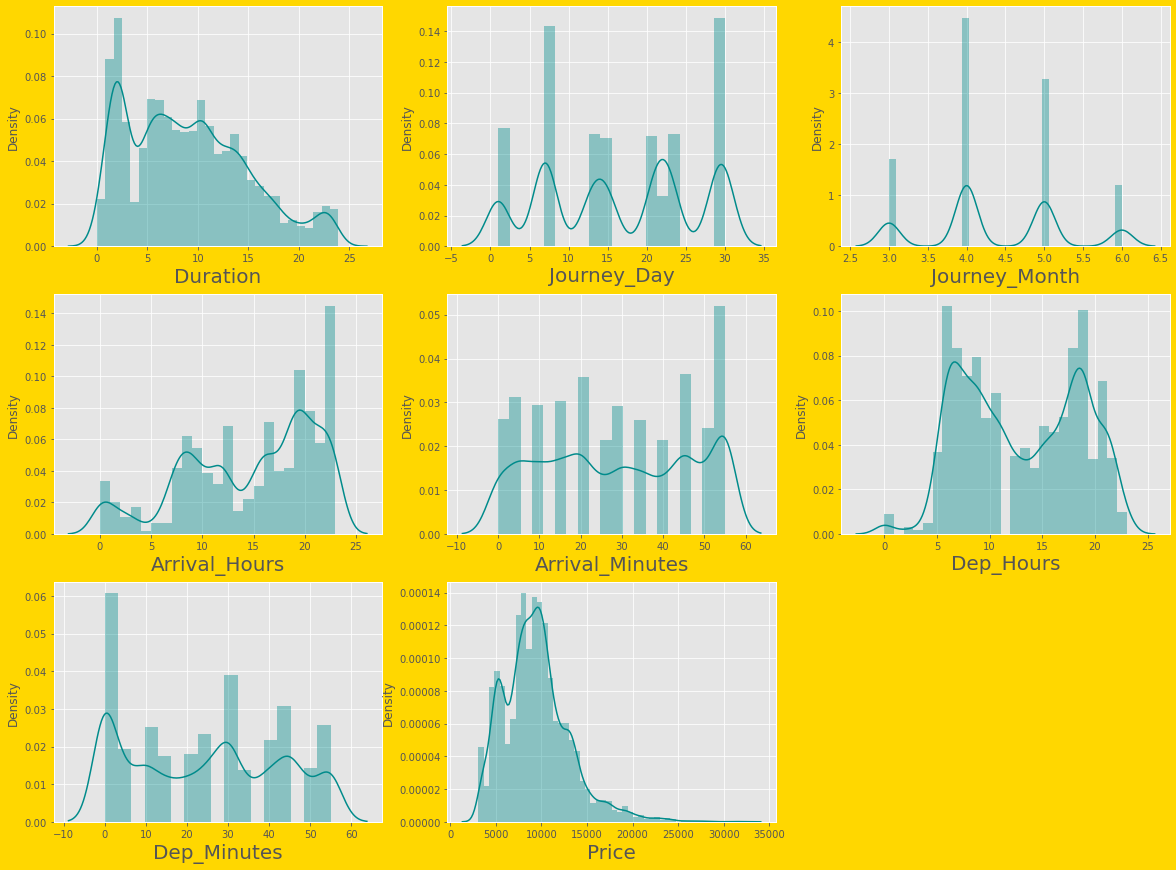

In [28]:
plt.figure(figsize=(20,15),facecolor='Gold')
plt.style.use('ggplot')
plot_no = 1
for column in df1:
    if plot_no<=8:
        ax = plt.subplot(3,3,plot_no)
        sns.distplot(df1[column],color='DarkCyan')
        plt.xlabel(column,fontsize=20)
    plot_no+=1
plt.show()    

#### c). Visualization using hist plot

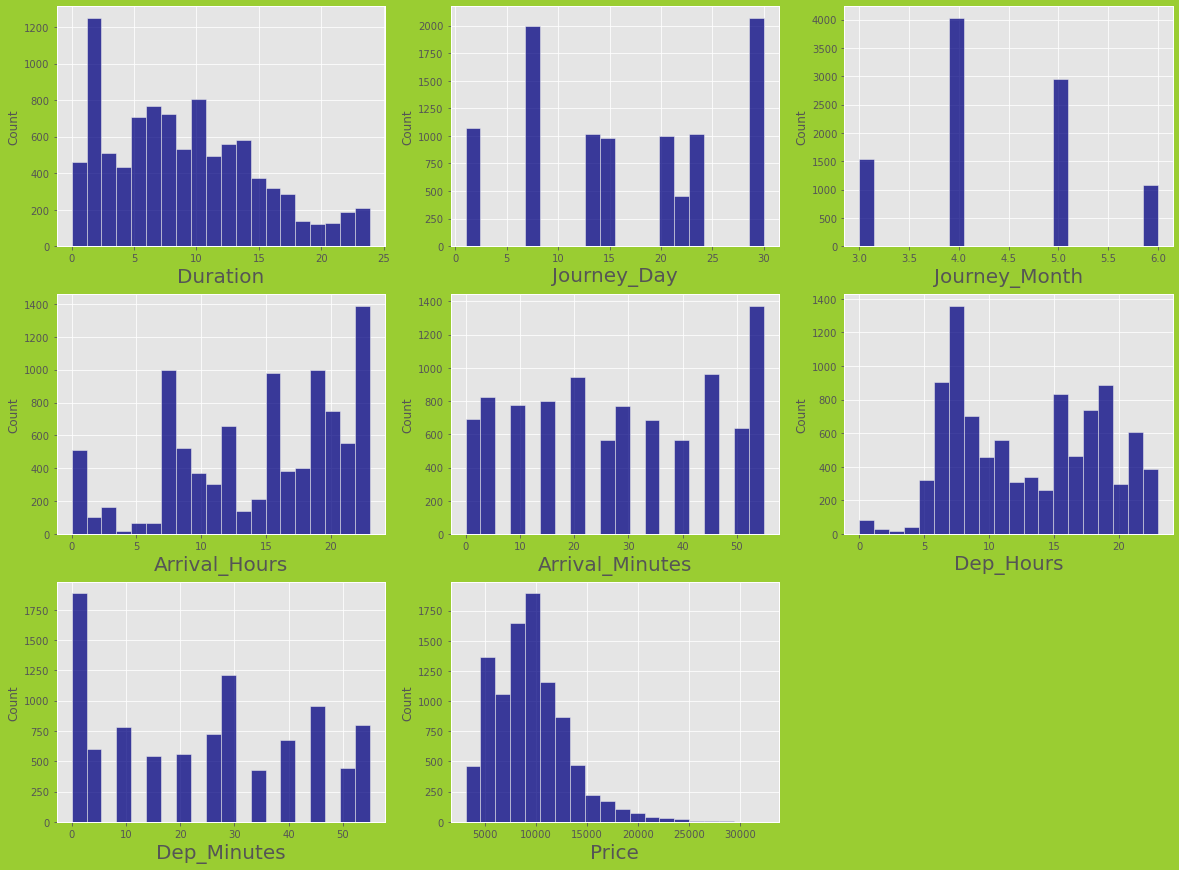

In [29]:
plt.figure(figsize=(20,15),facecolor='YellowGreen')
plt.style.use('ggplot')
plot_no = 1
for column in df1:
    if plot_no<=8:
        ax = plt.subplot(3,3,plot_no)
        sns.histplot(df1[column],color='Navy',bins=20)
        plt.xlabel(column,fontsize=20)
    plot_no+=1
plt.show() 

##### Oucome : Little bit skewness is there i will check it later.

#### d). Visualization using boxplot for checking outlier's

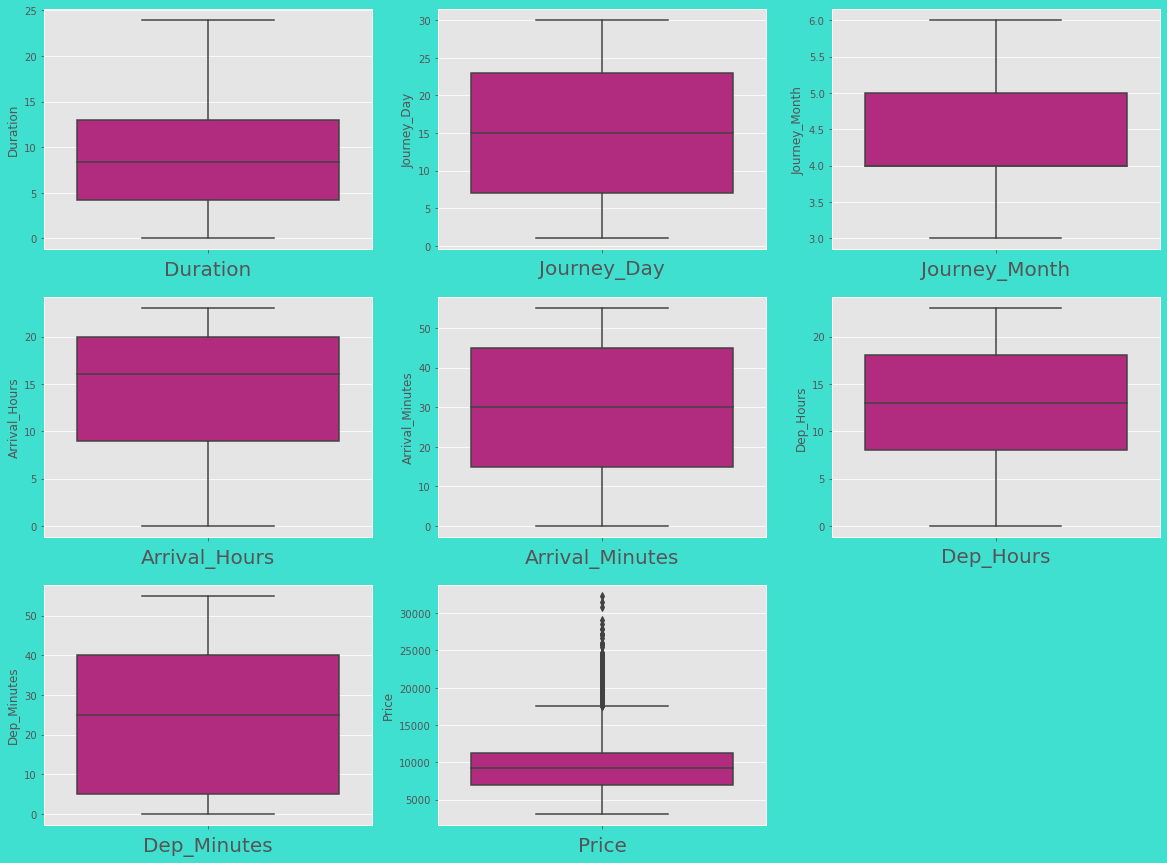

In [30]:
plt.figure(figsize=(20,15),facecolor='Turquoise')
plt.style.use('ggplot')
plot_no = 1
for column in df1:
    if plot_no<=8:
        ax = plt.subplot(3,3,plot_no)
        sns.boxplot(y=df1[column],color='MediumVioletRed')
        plt.xlabel(column,fontsize=20)
    plot_no+=1
plt.show() 

##### Outcome : 'Price' has outliers. 'Price' is target so no need to worry about it.

#### e). Visualization of object columns

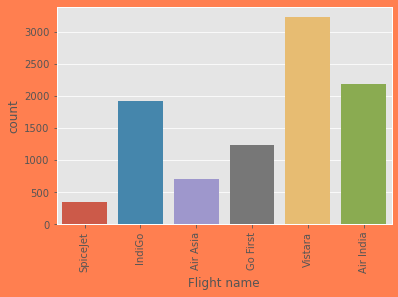

In [31]:
plt.figure(facecolor='Coral')
sns.countplot('Flight name',data=df)
plt.xticks(rotation=90);

##### Outcome : Most of the flight in the dataset is of  'Vistara' followed by 'Air India'.

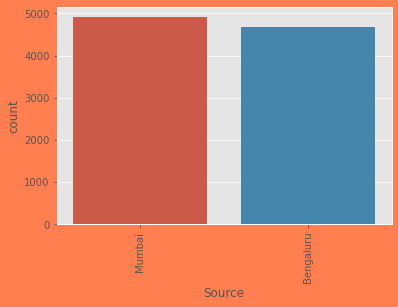

In [32]:
plt.figure(facecolor='Coral')
sns.countplot('Source',data=df)
plt.xticks(rotation=90);

##### Outcome : The flight with Source location as 'Mumbai' are more in counting in compare to 'Bengaluru'.

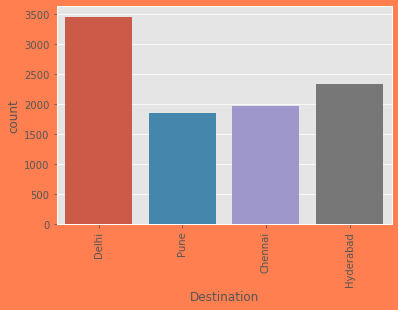

In [33]:
plt.figure(facecolor='Coral')
sns.countplot('Destination',data=df)
plt.xticks(rotation=90);

##### Outcome : The flight with Destination location as 'Delhi' are more in counting

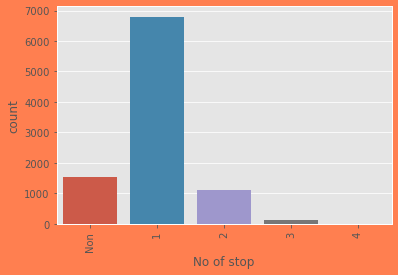

In [34]:
plt.figure(facecolor='Coral')
sns.countplot('No of stop',data=df)
plt.xticks(rotation=90);

##### Outcome : The flight with 1 stop are more in counting.

### 7. Data Visualization with respect to target column

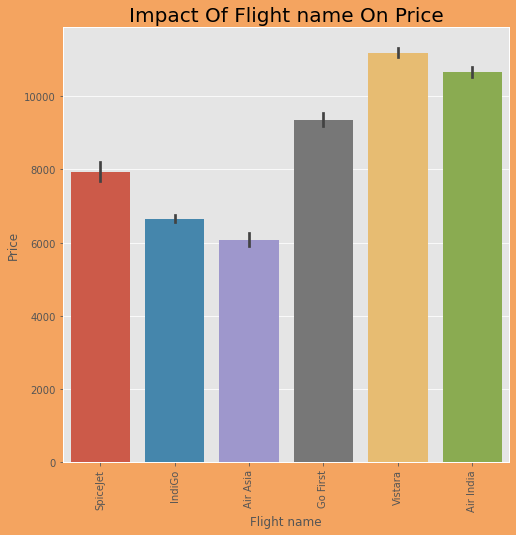

In [35]:
plt.figure(figsize=(8,8),facecolor='SandyBrown')
sns.barplot(x='Flight name',y='Price',data=df)
plt.title('Impact Of Flight name On Price',fontsize=20)
plt.xticks(rotation=90);

##### Outcome : 'Vistara' flight price are high, followed by 'Air India'.

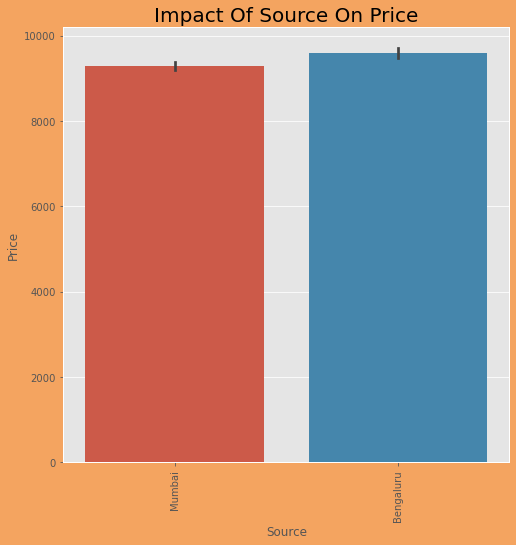

In [36]:
plt.figure(figsize=(8,8),facecolor='SandyBrown')
sns.barplot(x='Source',y='Price',data=df)
plt.title('Impact Of Source On Price',fontsize=20)
plt.xticks(rotation=90);

##### Outcome : Those flight who has Source as 'Bengaluru' having high price.

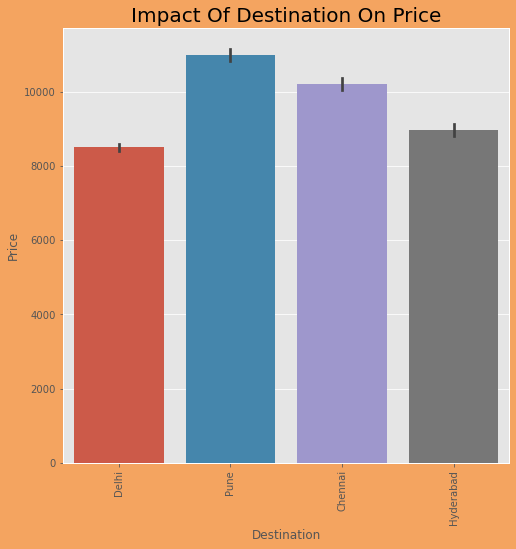

In [37]:
plt.figure(figsize=(8,8),facecolor='SandyBrown')
sns.barplot(x='Destination',y='Price',data=df)
plt.title('Impact Of Destination On Price',fontsize=20)
plt.xticks(rotation=90);

##### Outcome : Those flight who has Destination as 'Pune' having high price.

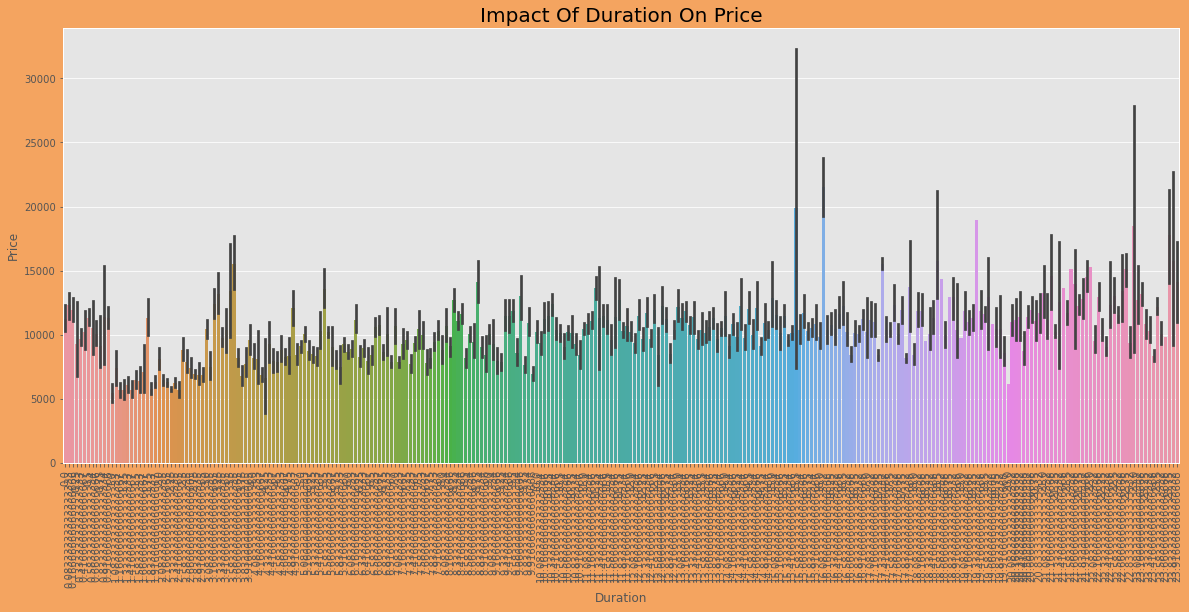

In [38]:
plt.figure(figsize=(20,8),facecolor='SandyBrown')
sns.barplot(x='Duration',y='Price',data=df)
plt.title('Impact Of Duration On Price',fontsize=20)
plt.xticks(rotation=90);

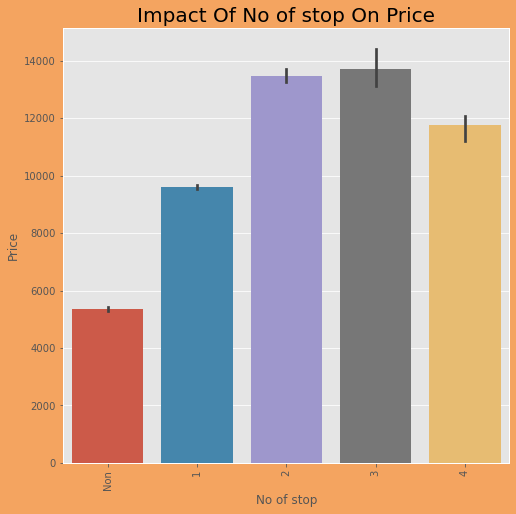

In [39]:
plt.figure(figsize=(8,8),facecolor='SandyBrown')
sns.barplot(x='No of stop',y='Price',data=df)
plt.title('Impact Of No of stop On Price',fontsize=20)
plt.xticks(rotation=90);

##### Outcome : The fligh with 2 and 3 stop having high price.

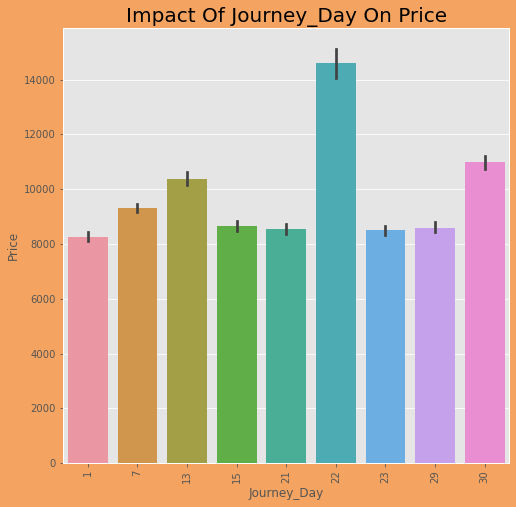

In [40]:
plt.figure(figsize=(8,8),facecolor='SandyBrown')
sns.barplot(x='Journey_Day',y='Price',data=df)
plt.title('Impact Of Journey_Day On Price',fontsize=20)
plt.xticks(rotation=90);

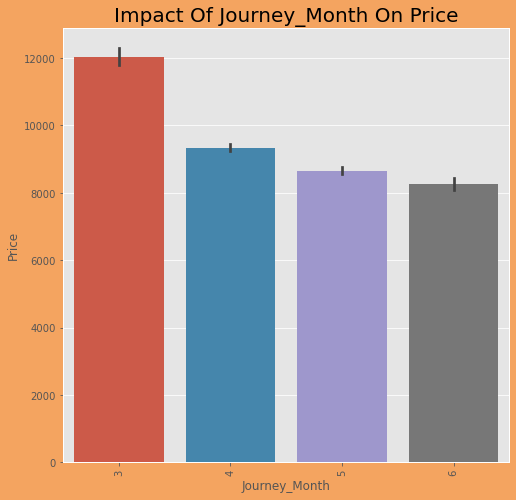

In [41]:
plt.figure(figsize=(8,8),facecolor='SandyBrown')
sns.barplot(x='Journey_Month',y='Price',data=df)
plt.title('Impact Of Journey_Month On Price',fontsize=20)
plt.xticks(rotation=90);

##### Outcome : The price are high if booking is done on within one week of journey date. 

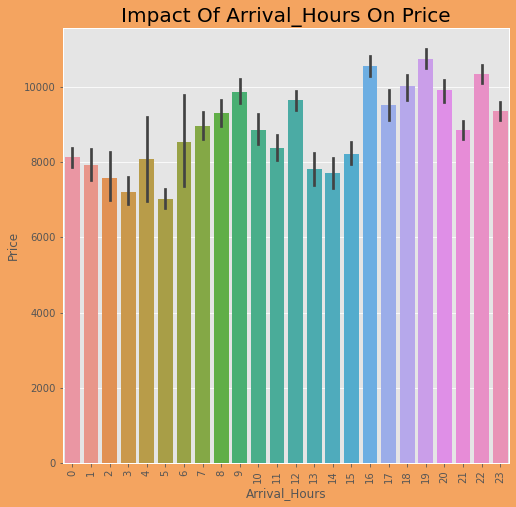

In [42]:
plt.figure(figsize=(8,8),facecolor='SandyBrown')
sns.barplot(x='Arrival_Hours',y='Price',data=df)
plt.title('Impact Of Arrival_Hours On Price',fontsize=20)
plt.xticks(rotation=90);

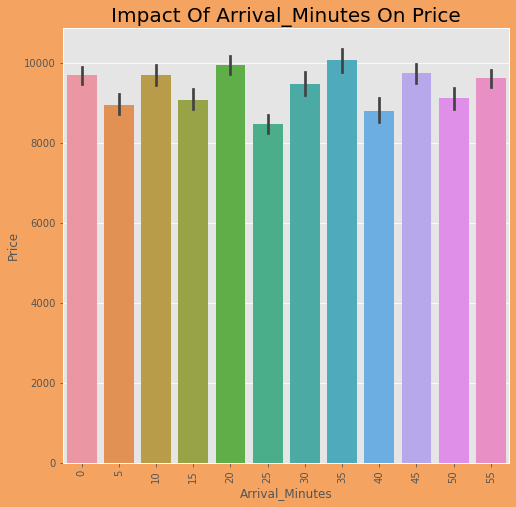

In [43]:
plt.figure(figsize=(8,8),facecolor='SandyBrown')
sns.barplot(x='Arrival_Minutes',y='Price',data=df)
plt.title('Impact Of Arrival_Minutes On Price',fontsize=20)
plt.xticks(rotation=90);

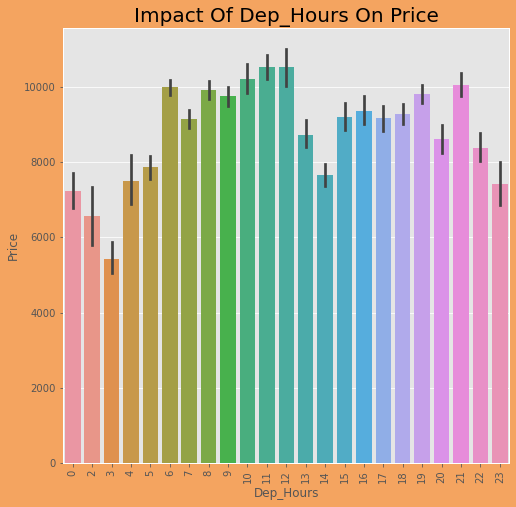

In [44]:
plt.figure(figsize=(8,8),facecolor='SandyBrown')
sns.barplot(x='Dep_Hours',y='Price',data=df)
plt.title('Impact Of Dep_Hours On Price',fontsize=20)
plt.xticks(rotation=90);

##### Outcome : from 6 to 11 in the Morning flights are expensive. 

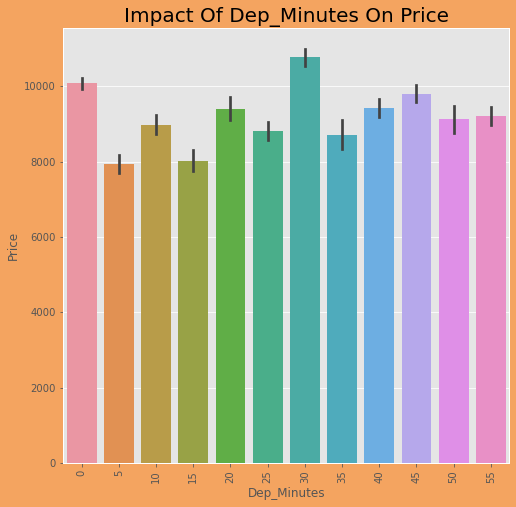

In [45]:
plt.figure(figsize=(8,8),facecolor='SandyBrown')
sns.barplot(x='Dep_Minutes',y='Price',data=df)
plt.title('Impact Of Dep_Minutes On Price',fontsize=20)
plt.xticks(rotation=90);

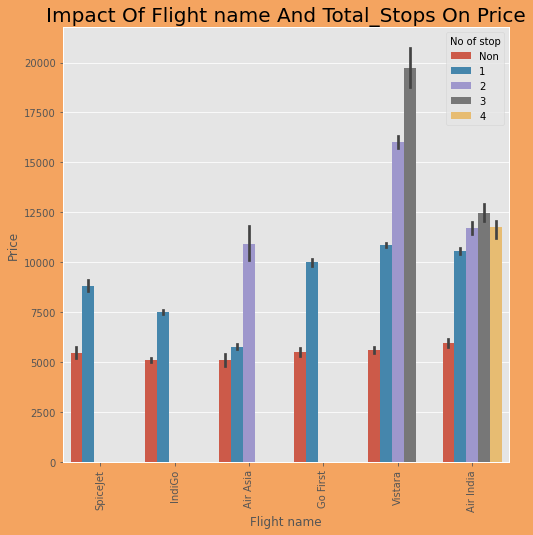

In [46]:
plt.figure(figsize=(8,8),facecolor='SandyBrown')
sns.barplot(y='Price',x='Flight name',hue='No of stop',data=df)
plt.title('Impact Of Flight name And Total_Stops On Price',fontsize=20)
plt.xticks(rotation=90);

##### Outcome : 'Vistara' airline price are high when flight have 3 stop

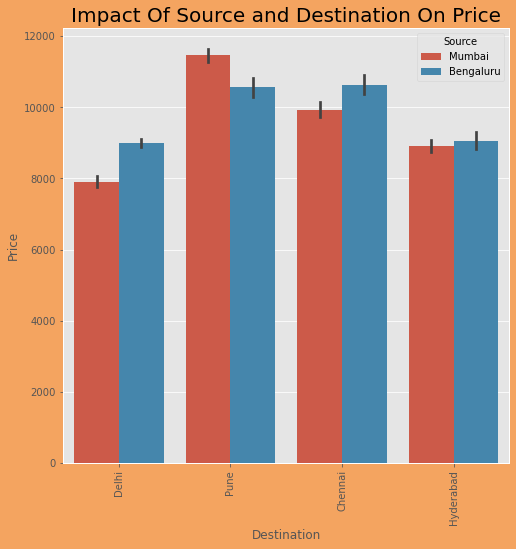

In [47]:
plt.figure(figsize=(8,8),facecolor='SandyBrown')
sns.barplot(y='Price',x='Destination',hue='Source',data=df)
plt.title('Impact Of Source and Destination On Price',fontsize=20)
plt.xticks(rotation=90);

##### Outcome : Mumbai to Pune flight ticket are most expensive ticket.

### 8. Features Engineering

#### a). Dealing with outlier's

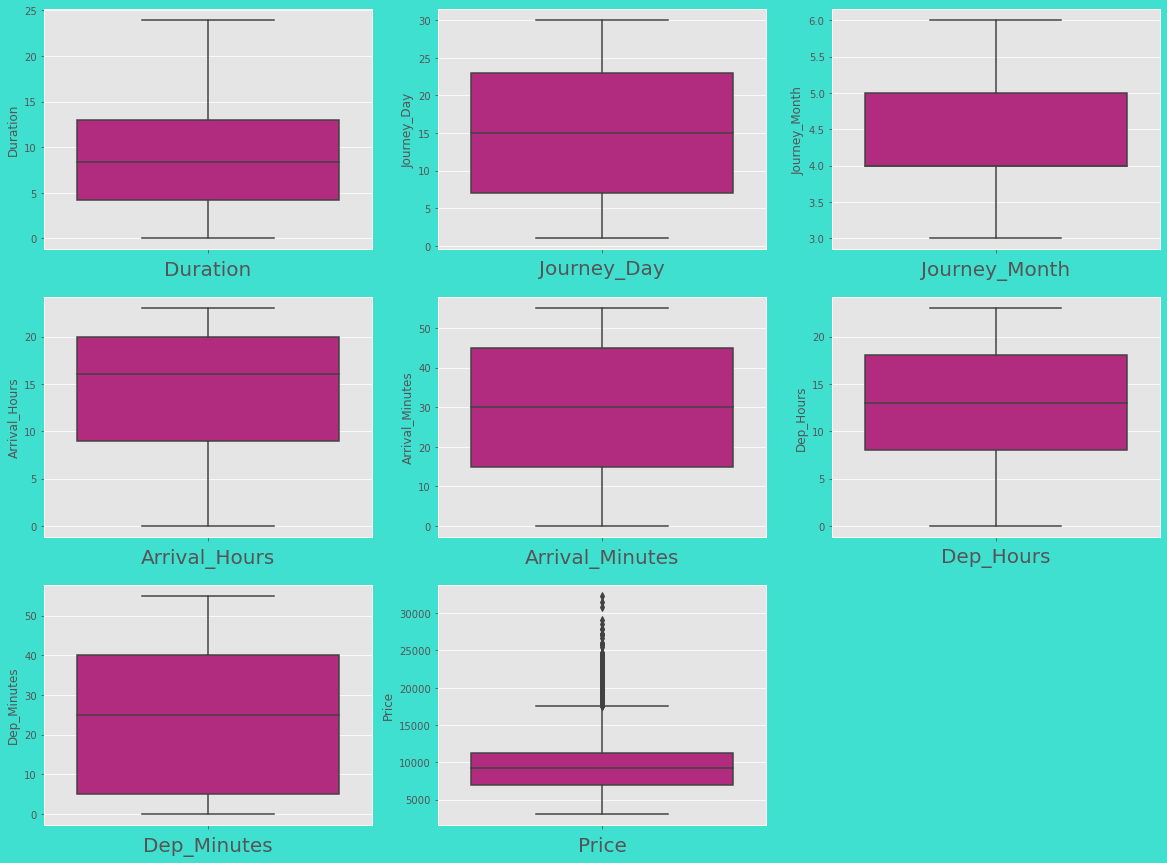

In [48]:
plt.figure(figsize=(20,15),facecolor='Turquoise')
plt.style.use('ggplot')
plot_no = 1
for column in df1:
    if plot_no<=8:
        ax = plt.subplot(3,3,plot_no)
        sns.boxplot(y=df1[column],color='MediumVioletRed')
        plt.xlabel(column,fontsize=20)
    plot_no+=1
plt.show() 

##### Outcome : Price has outliers. As 'Price' is target variable so no need to worry about.

#### b). Dealing with skewness

In [49]:
df.skew()

Duration           0.527675
Journey_Day       -0.083201
Journey_Month      0.181907
Arrival_Hours     -0.573463
Arrival_Minutes   -0.012458
Dep_Hours          0.020253
Dep_Minutes        0.099470
Price              1.024830
dtype: float64

##### Outcome : Skewness is not present. I can proceed further.

#### c). Encoding the categorical column using Label Encoder

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9598 entries, 0 to 9597
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Flight name      9598 non-null   object 
 1   Source           9598 non-null   object 
 2   Destination      9598 non-null   object 
 3   Duration         9598 non-null   float64
 4   No of stop       9598 non-null   object 
 5   Journey_Day      9598 non-null   int64  
 6   Journey_Month    9598 non-null   int64  
 7   Arrival_Hours    9598 non-null   int64  
 8   Arrival_Minutes  9598 non-null   int64  
 9   Dep_Hours        9598 non-null   int64  
 10  Dep_Minutes      9598 non-null   int64  
 11  Price            9598 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 899.9+ KB


In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
lb = LabelEncoder()

In [53]:
df['Flight name'] = lb.fit_transform(df['Flight name'])
df['Source'] = lb.fit_transform(df['Source'])
df['Destination'] = lb.fit_transform(df['Destination'])
df['No of stop'] = lb.fit_transform(df['No of stop'])

In [54]:
df

,Flight name,Source,Destination,Duration,No of stop,Journey_Day,Journey_Month,Arrival_Hours,Arrival_Minutes,Dep_Hours,Dep_Minutes,Price
0,4,1,1,2.000000,4,22,3,23,45,21,45,7308
1,3,1,1,2.083333,4,22,3,19,20,17,15,7308
2,3,1,1,2.083333,4,22,3,20,35,18,30,7308
3,3,1,1,2.083333,4,22,3,22,35,20,30,7308
4,3,1,1,2.083333,4,22,3,0,25,22,20,7308
...,...,...,...,...,...,...,...,...,...,...,...,...
9593,5,0,2,10.333333,1,1,6,17,0,6,40,13684
9594,1,0,2,21.916667,1,1,6,11,15,13,20,13740
9595,1,0,2,1.250000,1,1,6,11,15,10,0,13740
9596,1,0,2,5.083333,1,1,6,11,15,6,10,13740


### 9. Correlation matrix to see the coffecient of multicolinearity

#### a). Visualize by matrix

In [55]:
df_corr = df.corr().abs()
df_corr

,Flight name,Source,Destination,Duration,No of stop,Journey_Day,Journey_Month,Arrival_Hours,Arrival_Minutes,Dep_Hours,Dep_Minutes,Price
Flight name,1.000000,0.097332,0.010885,0.028901,0.040354,0.011596,0.027296,0.108929,0.193433,0.004035,0.313771,0.207340
Source,0.097332,1.000000,0.060636,0.013256,0.020782,0.006622,0.010394,0.046557,0.054936,0.026615,0.109988,0.041726
Destination,0.010885,0.060636,1.000000,0.051805,0.083359,0.000286,0.008388,0.072735,0.072920,0.028815,0.007119,0.088375
Duration,0.028901,0.013256,0.051805,1.000000,0.488522,0.000367,0.010881,0.023941,0.038832,0.059034,0.037448,0.376273
No of stop,0.040354,0.020782,0.083359,0.488522,1.000000,0.000535,0.001056,0.086090,0.025860,0.015691,0.014143,0.379531
Journey_Day,0.011596,0.006622,0.000286,0.000367,0.000535,1.000000,0.670218,0.000666,0.000357,0.028414,0.002178,0.102789
Journey_Month,0.027296,0.010394,0.008388,0.010881,0.001056,0.670218,1.000000,0.000373,0.003902,0.072264,0.006042,0.287436
Arrival_Hours,0.108929,0.046557,0.072735,0.023941,0.086090,0.000666,0.000373,1.000000,0.056096,0.136609,0.039451,0.152138
Arrival_Minutes,0.193433,0.054936,0.072920,0.038832,0.025860,0.000357,0.003902,0.056096,1.000000,0.014538,0.097524,0.012523
Dep_Hours,0.004035,0.026615,0.028815,0.059034,0.015691,0.028414,0.072264,0.136609,0.014538,1.000000,0.088067,0.008577


#### b). Visualize by heatmap

<AxesSubplot:>

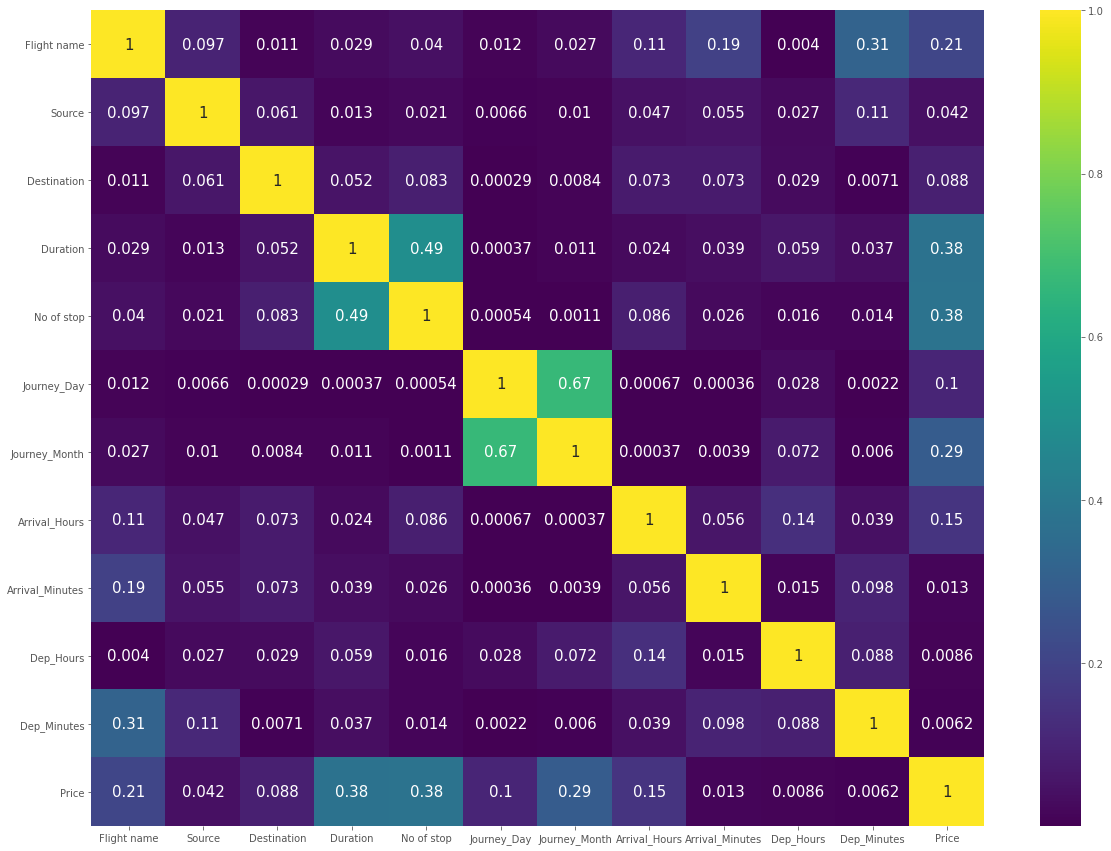

In [56]:
plt.figure(figsize=(20,15))
sns.heatmap(df_corr,annot=True,annot_kws={'size':15},cmap='viridis')

##### Outcome : Features are very less correlated with target.

### 10. Sepatating the dependent variable as y as Price and rest are independent variable as X

In [57]:
y = df['Price']
X = df.drop(columns='Price',axis=1)

### 11. Scaling the data set using Standard Scaler

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
ss = StandardScaler()

In [60]:
X_scaled = ss.fit_transform(X)

In [61]:
X_scaled

array([[ 0.62406391,  0.97672423, -0.41557292, ...,  0.89148803,
         1.44259278,  1.10979103],
       [ 0.05257594,  0.97672423, -0.41557292, ..., -0.49368682,
         0.72353455, -0.51751064],
       [ 0.05257594,  0.97672423, -0.41557292, ...,  0.33741809,
         0.90329911,  0.29614019],
       ...,
       [-1.09039999, -1.02383044,  0.56613244, ..., -0.77072179,
        -0.53481735, -1.33116147],
       [-1.09039999, -1.02383044,  0.56613244, ..., -0.77072179,
        -1.25387558, -0.78872758],
       [ 1.19555187, -1.02383044,  0.56613244, ...,  1.168523  ,
        -0.71458191,  0.29614019]])

### 12. Checking multicolinearity using VIF

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['features'] = X.columns

vif

,vif,features
0,1.161778,Flight name
1,1.030309,Source
2,1.025113,Destination
3,1.330552,Duration
4,1.336734,No of stop
5,1.817318,Journey_Day
6,1.827070,Journey_Month
7,1.058301,Arrival_Hours
8,1.051712,Arrival_Minutes
9,1.042241,Dep_Hours


##### Outcome : vif score is normal so there is no multicolinerity exist.

### 13. Observing best random state & split the data using best random state

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

In [65]:
rf = RandomForestRegressor()
max_accuracy = 0
max_rs = 0
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=i)
    rf.fit(X_train,y_train)
    rf_pred_test = rf.predict(X_test)
    accuracy = r2_score(y_test,rf_pred_test)
    if accuracy>max_accuracy:
        max_accuracy = accuracy
        max_rs = i
print('Maximum accuracy is :',max_accuracy,'On random state :',max_rs)

Maximum accuracy is : 0.8893044920763784 On random state : 44


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=max_rs)

In [67]:
print('The Shape Of X-train is :',X_train.shape)
print('The Shape Of y-train is :',y_train.shape)
print('The Shape Of X-test is :',X_test.shape)
print('The Shape Of y-test is :',y_test.shape)

The Shape Of X-train is : (6718, 11)
The Shape Of y-train is : (6718,)
The Shape Of X-test is : (2880, 11)
The Shape Of y-test is : (2880,)


### 14. Initiate our model

#### a). Linear Regression Model

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lr = LinearRegression()
lr.fit(X_train,y_train)
score_pred_lr = lr.score(X_test,y_test)*100
y_pred_lr = lr.predict(X_test)
mse_lr=mean_squared_error(y_test,y_pred_lr)
score_lr=np.sqrt(mse_lr)
r2_score_lr = r2_score(y_test,y_pred_lr)
print('The score by Linear Regression on test set is :',score_pred_lr)
print('The MSE score is :',mse_lr)
print('The RMSE score is :',score_lr)
print('The r2 score is :',r2_score_lr)

The score by Linear Regression on test set is : 35.62018035637657
The MSE score is : 8508996.088078374
The RMSE score is : 2917.0183558007266
The r2 score is : 0.35620180356376574


#### Cross Validation on Linear Regression Model

In [70]:
score=cross_val_score(lr,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_lr=np.sqrt(-score)
print('The cross validation score :',np.mean(score_cross_lr),np.std(score_cross_lr))

The cross validation score : 2963.7476998003885 109.58516267317867


#### b). KNN Model

In [71]:
from sklearn.neighbors import KNeighborsRegressor

In [72]:
kn = KNeighborsRegressor()
kn.fit(X_train,y_train)
score_pred_kn = kn.score(X_test,y_test)*100
y_pred_kn = kn.predict(X_test)
mse_kn=mean_squared_error(y_test,y_pred_kn)
score_kn=np.sqrt(mse_kn)
r2_score_kn = r2_score(y_test,y_pred_kn)
print('The score by K-Neighbors Regressor on test set is :',score_pred_kn)
print('The MSE score is :',mse_kn)
print('The RMSE score is :',score_kn)
print('The r2 score is :',r2_score_kn)

The score by K-Neighbors Regressor on test set is : 73.50935368353765
The MSE score is : 3501233.882375
The RMSE score is : 1871.1584332640034
The r2 score is : 0.7350935368353766


#### Cross Validation K-Neighbors Regressor

In [73]:
score=cross_val_score(kn,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_kn=np.sqrt(-score)
print('The cross validation score :',np.mean(score_cross_kn),np.std(score_cross_kn))

The cross validation score : 2078.484649312992 129.8347309129714


#### c). Decision Tree Model

In [74]:
from sklearn.tree import DecisionTreeRegressor

In [75]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
score_pred_dt = dt.score(X_test,y_test)*100
y_pred_dt = dt.predict(X_test)
mse_dt=mean_squared_error(y_test,y_pred_dt)
score_dt=np.sqrt(mse_dt)
r2_score_dt = r2_score(y_test,y_pred_dt)
print('The score by  Decision TreeRegressor on test set is :',score_pred_dt)
print('The MSE score is :',mse_dt)
print('The RMSE score is :',score_dt)
print('The r2 score is :',r2_score_dt)

The score by  Decision TreeRegressor on test set is : 79.02658850331356
The MSE score is : 2772028.212673611
The RMSE score is : 1664.940903658028
The r2 score is : 0.7902658850331357


#### Cross Validation Decision Tree Regressor

In [76]:
score=cross_val_score(dt,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_dt=np.sqrt(-score)
print('The cross validation score :',np.mean(score_cross_dt),np.std(score_cross_dt))

The cross validation score : 1825.7452717499116 101.63773529263787


#### d). Random Forest Model

In [77]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
score_pred_rf = rf.score(X_test,y_test)*100
y_pred_rf = rf.predict(X_test)
mse_rf=mean_squared_error(y_test,y_pred_rf)
score_rf=np.sqrt(mse_rf)
r2_score_rf = r2_score(y_test,y_pred_rf)
print('The score by  Random Forest Regressor on test set is :',score_pred_rf)
print('The MSE score is :',mse_rf)
print('The RMSE score is :',score_rf)
print('The r2 score is :',r2_score_rf)

The score by  Random Forest Regressor on test set is : 88.8337972761411
The MSE score is : 1475822.3278964427
The RMSE score is : 1214.8342800137157
The r2 score is : 0.888337972761411


#### Cross Validation Random Forest Regressor

In [78]:
score=cross_val_score(rf,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_rf=np.sqrt(-score)
print('The cross validation score :',np.mean(score_cross_rf),np.std(score_cross_rf))

The cross validation score : 1419.4787291126345 61.21270034863392


#### e). Support Vector Machine

In [79]:
from sklearn.svm import SVR

In [80]:
sr = SVR()
sr.fit(X_train,y_train)
score_pred_sr = sr.score(X_test,y_test)*100
y_pred_sr = sr.predict(X_test)
mse_sr=mean_squared_error(y_test,y_pred_sr)
score_sr=np.sqrt(mse_sr)
r2_score_sr = r2_score(y_test,y_pred_sr)
print('The score by  Support Vector Machine Regressor on test set is :',score_pred_sr)
print('The MSE score is :',mse_sr)
print('The RMSE score is :',score_sr)
print('The r2 score is :',r2_score_sr)

The score by  Support Vector Machine Regressor on test set is : 3.1511902870367425
The MSE score is : 12800379.80137886
The RMSE score is : 3577.761842462248
The r2 score is : 0.031511902870367425


#### Cross Validation On Support Vector Machine Regressor

In [81]:
score=cross_val_score(sr,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_sr=np.sqrt(-score)
print('The cross validation score :',np.mean(score_cross_sr),np.std(score_cross_sr))

The cross validation score : 3577.5230351601226 128.47422336768145


#### f). Bagging Regressor

In [82]:
from sklearn.ensemble import BaggingRegressor

In [83]:
br = BaggingRegressor()
br.fit(X_train,y_train)
score_pred_br = br.score(X_test,y_test)*100
y_pred_br = br.predict(X_test)
mse_br=mean_squared_error(y_test,y_pred_br)
score_br=np.sqrt(mse_br)
r2_score_br = r2_score(y_test,y_pred_br)
print('The score by  Bagging Regressor on test set is :',score_pred_br)
print('The MSE score is :',mse_br)
print('The RMSE score is :',score_br)
print('The r2 score is :',r2_score_br)

The score by  Bagging Regressor on test set is : 86.84329703200208
The MSE score is : 1738904.1272002324
The RMSE score is : 1318.6751408896098
The r2 score is : 0.8684329703200209


#### Cross Validation on Bagging Regressor

In [84]:
score=cross_val_score(br,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_br=np.sqrt(-score)
print('The cross validation score :',np.mean(score_cross_br),np.std(score_cross_br))

The cross validation score : 1516.4683210235528 78.67065104596101


#### g). Ada Boost Regressor

In [85]:
from sklearn.ensemble import AdaBoostRegressor

In [86]:
ar = AdaBoostRegressor()
ar.fit(X_train,y_train)
score_pred_ar = ar.score(X_test,y_test)*100
y_pred_ar = ar.predict(X_test)
mse_ar=mean_squared_error(y_test,y_pred_ar)
score_ar=np.sqrt(mse_ar)
r2_score_ar = r2_score(y_test,y_pred_ar)
print('The score by  Ada Boost Regressor on test set is :',score_pred_ar)
print('The MSE score is :',mse_ar)
print('The RMSE score is :',score_ar)
print('The r2 score is :',r2_score_ar)

The score by  Ada Boost Regressor on test set is : 23.608939657694272
The MSE score is : 10096505.973688599
The RMSE score is : 3177.499956520629
The r2 score is : 0.23608939657694272


#### Corss Validation on Ada Boost Regressor

In [87]:
score=cross_val_score(ar,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_ar=np.sqrt(-score)
print('The cross validation score :',np.mean(score_cross_ar),np.std(score_cross_ar))

The cross validation score : 3125.906779886339 157.83758845387365


#### h). Gradient Boosting Regressor

In [88]:
from sklearn.ensemble import GradientBoostingRegressor

In [89]:
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)
score_pred_gr = gr.score(X_test,y_test)*100
y_pred_gr = gr.predict(X_test)
mse_gr=mean_squared_error(y_test,y_pred_gr)
score_gr=np.sqrt(mse_gr)
r2_score_gr = r2_score(y_test,y_pred_gr)
print('The score by  Gradient Boosting Regressor on test set is :',score_pred_gr)
print('The MSE score is :',mse_gr)
print('The RMSE score is :',score_gr)
print('The r2 score is :',r2_score_gr)

The score by  Gradient Boosting Regressor on test set is : 77.6244594921053
The MSE score is : 2957345.759963975
The RMSE score is : 1719.693507565803
The r2 score is : 0.776244594921053


#### Corss Validation on Gradient Boosting Regressor

In [90]:
score=cross_val_score(gr,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_gr=np.sqrt(-score)
print('The cross validation score :',np.mean(score_cross_gr),np.std(score_cross_gr))

The cross validation score : 1860.797738726719 101.33041095683322


#### i). XGB Boost

In [91]:
import xgboost as xb

In [92]:
xr = xb.XGBRegressor()
xr.fit(X_train,y_train)
score_pred_xr = xr.score(X_test,y_test)*100
y_pred_xr = xr.predict(X_test)
mse_xr=mean_squared_error(y_test,y_pred_xr)
score_xr=np.sqrt(mse_xr)
r2_score_xr = r2_score(y_test,y_pred_xr)
print('The score by  XGB Boost Regressor on test set is :',score_pred_xr)
print('The MSE score is :',mse_xr)
print('The RMSE score is :',score_xr)
print('The r2 score is :',r2_score_xr)

The score by  XGB Boost Regressor on test set is : 88.33015699271559
The MSE score is : 1542387.8017543806
The RMSE score is : 1241.9290647031257
The r2 score is : 0.8833015699271559


#### Corss Validation on XGB Regressor

In [93]:
score=cross_val_score(xr,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_xr=np.sqrt(-score)
print('The cross validation score :',np.mean(score_cross_xr),np.std(score_cross_xr))

The cross validation score : 1397.1167559400465 112.1900729735818


### 14. Observing the score

In [94]:
all_score = pd.DataFrame({})

In [95]:
all_score['Name Of Model'] = ['Linear Regression','K-Neighbors Regressor','Decision Tree Regressor','Random Forest Regressor','Support Vector Machine Regressor','Bagging Regressor','Ada Boost Regressor','Gradient Boosting Regressor','XGB Regressor']

In [96]:
all_score['Score On Test'] = [score_pred_lr,score_pred_kn,score_pred_dt,score_pred_rf,score_pred_sr,score_pred_br,score_pred_ar,score_pred_gr,score_pred_xr]

In [97]:
all_score['R2 Score'] = [r2_score_lr,r2_score_kn,r2_score_dt,r2_score_rf,r2_score_sr,r2_score_br,r2_score_ar,r2_score_gr,r2_score_xr]

In [98]:
all_score['RMSE'] = [score_lr,score_kn,score_dt,score_rf,score_sr,score_br,score_ar,score_gr,score_xr]

In [99]:
all_score['MSE'] = [mse_lr,mse_kn,mse_dt,mse_rf,mse_sr,mse_br,mse_ar,mse_gr,mse_xr]

In [100]:
all_score['CV Score'] = [np.mean(score_cross_lr),np.mean(score_cross_kn),np.mean(score_cross_dt),np.mean(score_cross_rf),np.mean(score_cross_sr),np.mean(score_cross_br),np.mean(score_cross_ar),np.mean(score_cross_gr),np.mean(score_cross_xr)]

In [101]:
all_score

,Name Of Model,Score On Test,R2 Score,RMSE,MSE,CV Score
0,Linear Regression,35.620180,0.356202,2917.018356,8.508996e+06,2963.747700
1,K-Neighbors Regressor,73.509354,0.735094,1871.158433,3.501234e+06,2078.484649
2,Decision Tree Regressor,79.026589,0.790266,1664.940904,2.772028e+06,1825.745272
3,Random Forest Regressor,88.833797,0.888338,1214.834280,1.475822e+06,1419.478729
4,Support Vector Machine Regressor,3.151190,0.031512,3577.761842,1.280038e+07,3577.523035
5,Bagging Regressor,86.843297,0.868433,1318.675141,1.738904e+06,1516.468321
6,Ada Boost Regressor,23.608940,0.236089,3177.499957,1.009651e+07,3125.906780
7,Gradient Boosting Regressor,77.624459,0.776245,1719.693508,2.957346e+06,1860.797739
8,XGB Regressor,88.330157,0.883302,1241.929065,1.542388e+06,1397.116756


Text(0.5, 1.0, 'Test Score Analysis')

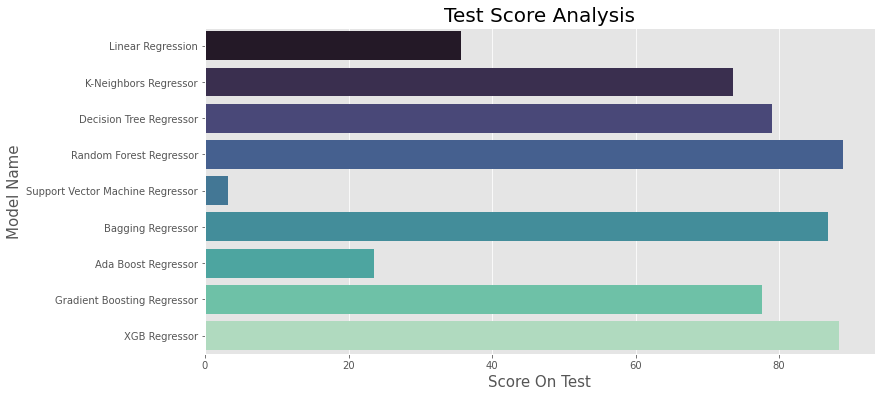

In [102]:
plt.figure(figsize=(12,6))
sns.barplot('Score On Test','Name Of Model',data=all_score,palette = "mako")
plt.xlabel('Score On Test',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('Test Score Analysis',fontsize=20)

Text(0.5, 1.0, 'RMSE Score Analysis')

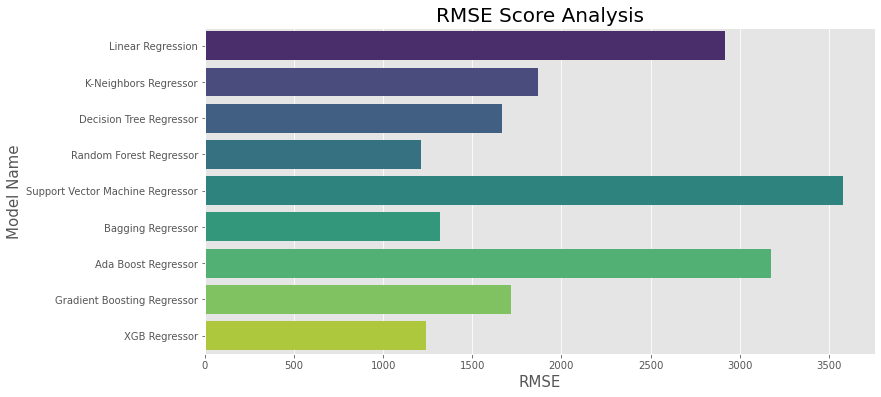

In [103]:
plt.figure(figsize=(12,6))
sns.barplot('RMSE','Name Of Model',data=all_score,palette = "viridis")
plt.xlabel('RMSE',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('RMSE Score Analysis',fontsize=20)

Text(0.5, 1.0, 'CV Score Analysis')

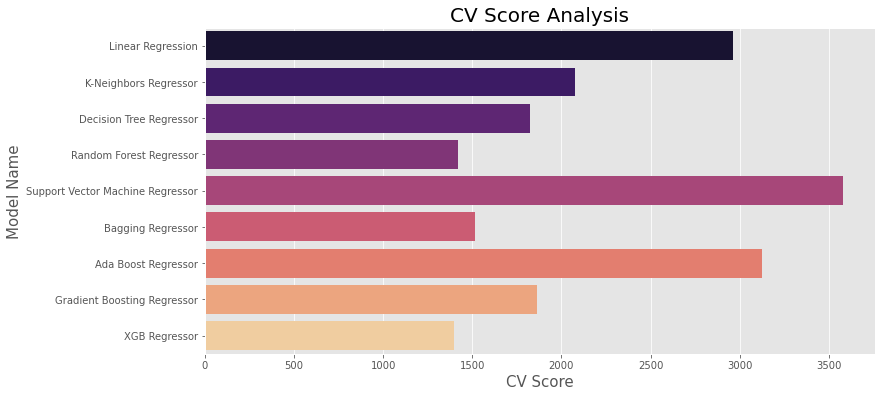

In [104]:
plt.figure(figsize=(12,6))
sns.barplot('CV Score','Name Of Model',data=all_score,palette = "magma")
plt.xlabel('CV Score',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('CV Score Analysis',fontsize=20)

Text(0.5, 1.0, 'R2 Score Analysis')

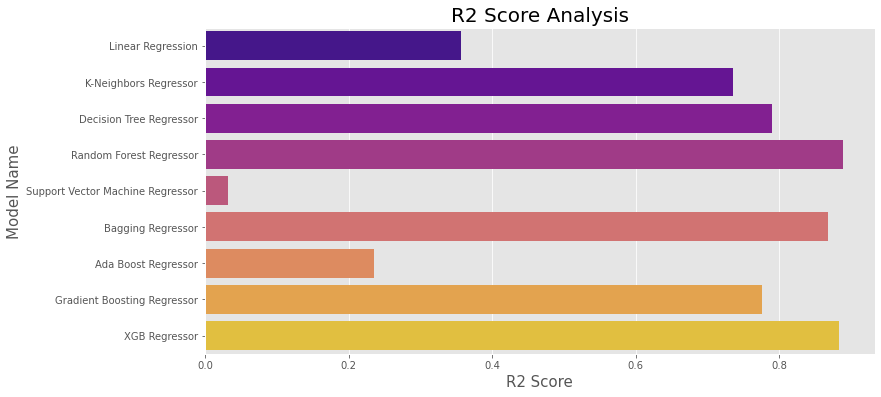

In [105]:
plt.figure(figsize=(12,6))
sns.barplot('R2 Score','Name Of Model',data=all_score,palette = "plasma")
plt.xlabel('R2 Score',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('R2 Score Analysis',fontsize=20)

### 15. Hyperparameter tunning on XGB regressor using GridSearch CV

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
clf = xb.XGBRegressor()
param = {'n_estimators':[100,150,200],
         'learning_rate' : [0.1,0.01,0.8],
         'max_depth' : [3,5,7,10],
         'subsample' : [0.1,0.5,0.9,1] 
         }

grd = GridSearchCV(clf,param_grid=param,scoring='neg_mean_squared_error',cv=10)
grd.fit(X_train,y_train)


clf = grd.best_estimator_

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Best parameter",grd.best_params_)
print("r2 score after hyper parameter tunning",r2_score(y_test,y_pred))

Best parameter {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}
r2 score after hyper parameter tunning 0.8975886479120276


##### Outcome : After hyperparameter tunning i am able to improve the performance of model.

### 16. Fit the model using best parameter

In [108]:
xr = xb.XGBRegressor(n_estimators = 200, learning_rate = 0.1, max_depth = 7, subsample = 0.9 )
xr.fit(X_train,y_train)
score_pred_xr = xr.score(X_test,y_test)*100
y_pred_xr = xr.predict(X_test)
mse_xr=mean_squared_error(y_test,y_pred_xr)
score_xr=np.sqrt(mse_xr)
r2_score_xr = r2_score(y_test,y_pred_xr)
print('The score by  XGB Boost Regressor on test set is :',score_pred_xr)
print('The MSE score is :',mse_xr)
print('The RMSE score is :',score_xr)
print('The r2 score is :',r2_score_xr)

The score by  XGB Boost Regressor on test set is : 89.75886479120277
The MSE score is : 1353557.3711065599
The RMSE score is : 1163.424845491345
The r2 score is : 0.8975886479120276


### 17. Saving the model

In [109]:
import pickle

In [110]:
final_result = 'Flight Price Prediction.pickle'
pickle.dump(xr,open(final_result,'wb'))

### 18. Load the model

In [111]:
finalize_model = open('Flight Price Prediction.pickle','rb')
model = pickle.load(finalize_model)

In [112]:
prediction = model.predict(X_test)
prediction

array([ 9897.004 ,  9979.604 ,  5597.42  , ..., 11042.3545, 10667.627 ,
        9023.984 ], dtype=float32)

In [113]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=['Prediction','Actual'])

,0,1,2,3,4,5,6,7,8,9,...,2870,2871,2872,2873,2874,2875,2876,2877,2878,2879
Prediction,9897.003906,9979.603516,5597.419922,10165.003906,3647.83374,11559.645508,14832.145508,13102.644531,8121.012695,11229.769531,...,7467.20166,3805.200439,7466.149902,15352.619141,10891.277344,12575.477539,9777.59082,11042.354492,10667.626953,9023.984375
Actual,10353.000000,10143.000000,5389.000000,10114.000000,3528.00000,12844.000000,13474.000000,11771.000000,7308.000000,13241.000000,...,7676.00000,3603.000000,6836.000000,18375.000000,11613.000000,12309.000000,9198.00000,10772.000000,10114.000000,9274.000000
